app.py

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

# Load the dataset with proper encoding
df = pd.read_csv('Global_Superstore2.csv', encoding='latin1')

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '.').str.replace('(', '').str.replace(')', '')


# Convert to datetime
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'], errors='coerce')
df.dropna(subset=['Order.Date', 'Ship.Date'], inplace=True)

# Sidebar Filters
st.sidebar.title("🔎 Filter Options")
region = st.sidebar.multiselect("Select Region", options=df['Region'].unique(), default=df['Region'].unique())
category = st.sidebar.multiselect("Select Category", options=df['Category'].unique(), default=df['Category'].unique())
sub_category = st.sidebar.multiselect("Select Sub-Category", options=df['Sub-Category'].unique(), default=df['Sub-Category'].unique())

# Apply Filters
filtered_df = df[
    (df['Region'].isin(region)) &
    (df['Category'].isin(category)) &
    (df['Sub-Category'].isin(sub_category))
]

# Title
st.title("📊 Superstore Sales Dashboard")

# KPIs
total_sales = filtered_df['Sales'].sum()
total_profit = filtered_df['Profit'].sum()
top_customers = filtered_df.groupby('Customer.Name')['Sales'].sum().sort_values(ascending=False).head(5)

# KPI Display
col1, col2 = st.columns(2)
col1.metric("💰 Total Sales", f"${total_sales:,.0f}")
col2.metric("📈 Total Profit", f"${total_profit:,.0f}")

# Top Customers Chart
st.subheader("🧑‍💼 Top 5 Customers by Sales")
st.bar_chart(top_customers)

# Monthly Sales Trend
monthly_sales = filtered_df.resample('M', on='Order.Date')['Sales'].sum()
st.subheader("📆 Monthly Sales Trend")
fig1 = px.line(monthly_sales, title='Monthly Sales')
st.plotly_chart(fig1)

# Sales by Category and Region
st.subheader("📦 Sales by Category")
cat_sales = filtered_df.groupby('Category')['Sales'].sum().sort_values()
st.bar_chart(cat_sales)

st.subheader("🌍 Sales by Region")
region_sales = filtered_df.groupby('Region')['Sales'].sum()
st.bar_chart(region_sales)

# Profit vs Sales Scatter Plot
st.subheader("📉 Profit vs Sales")
fig2 = px.scatter(
    filtered_df,
    x='Sales',
    y='Profit',
    color='Category',
    hover_data=['Customer.Name', 'Sub-Category', 'Region'],
    title="Profit vs Sales by Category"
)
st.plotly_chart(fig2)

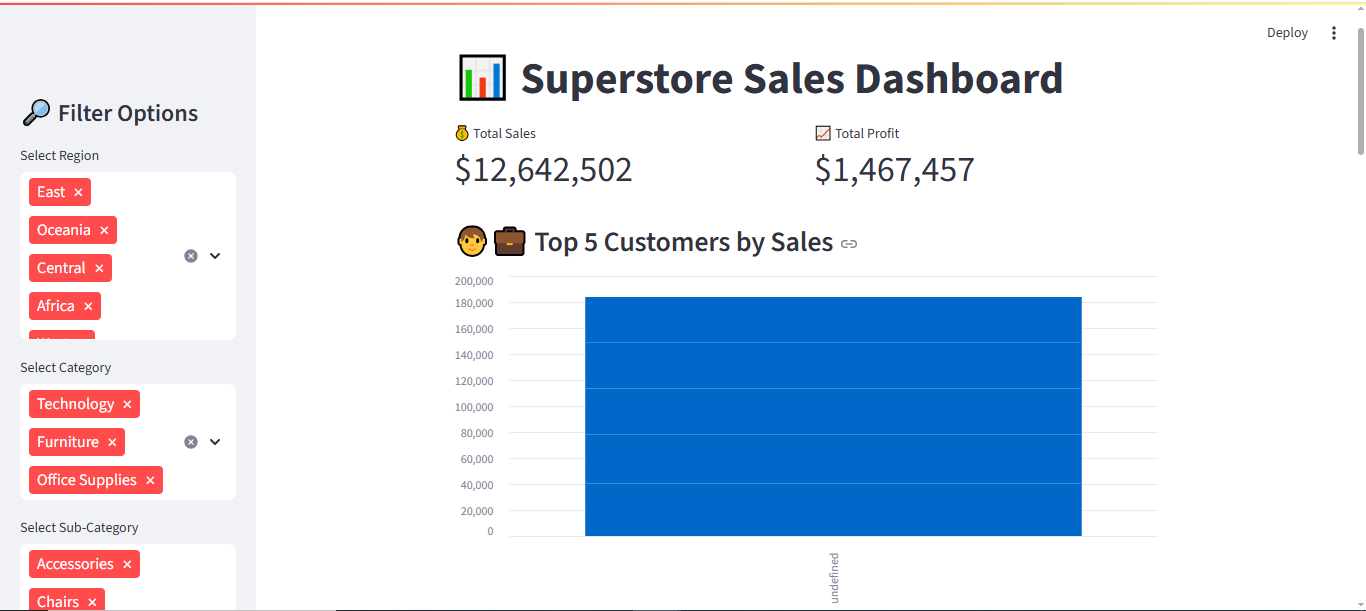

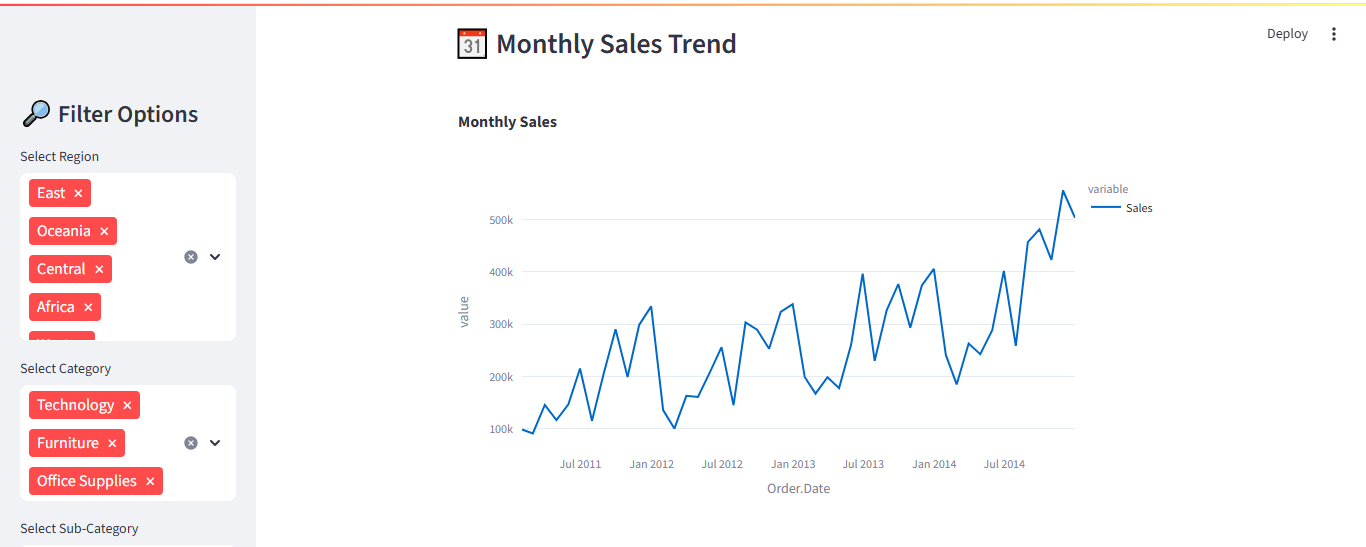

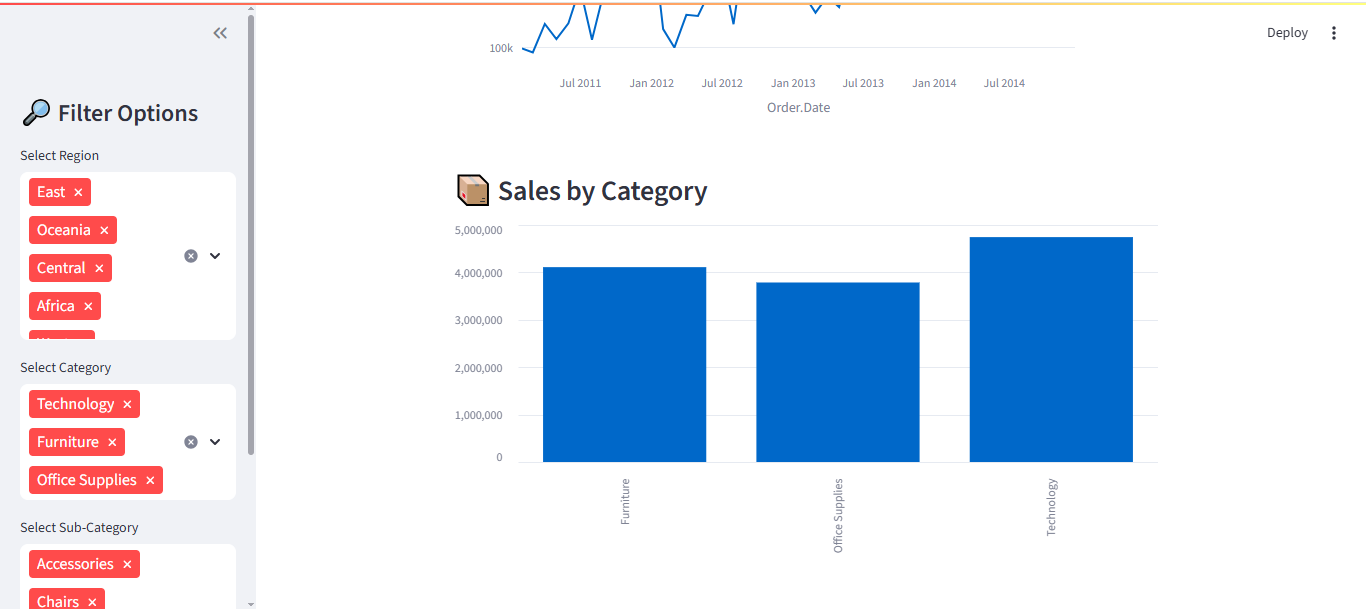

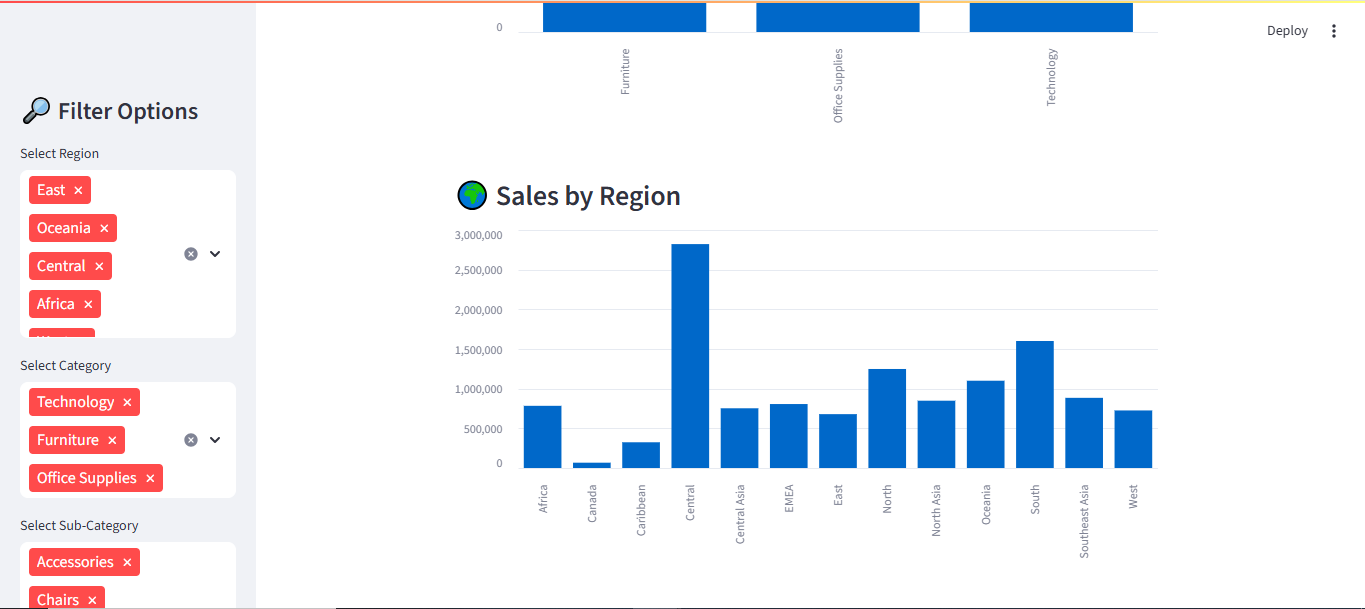

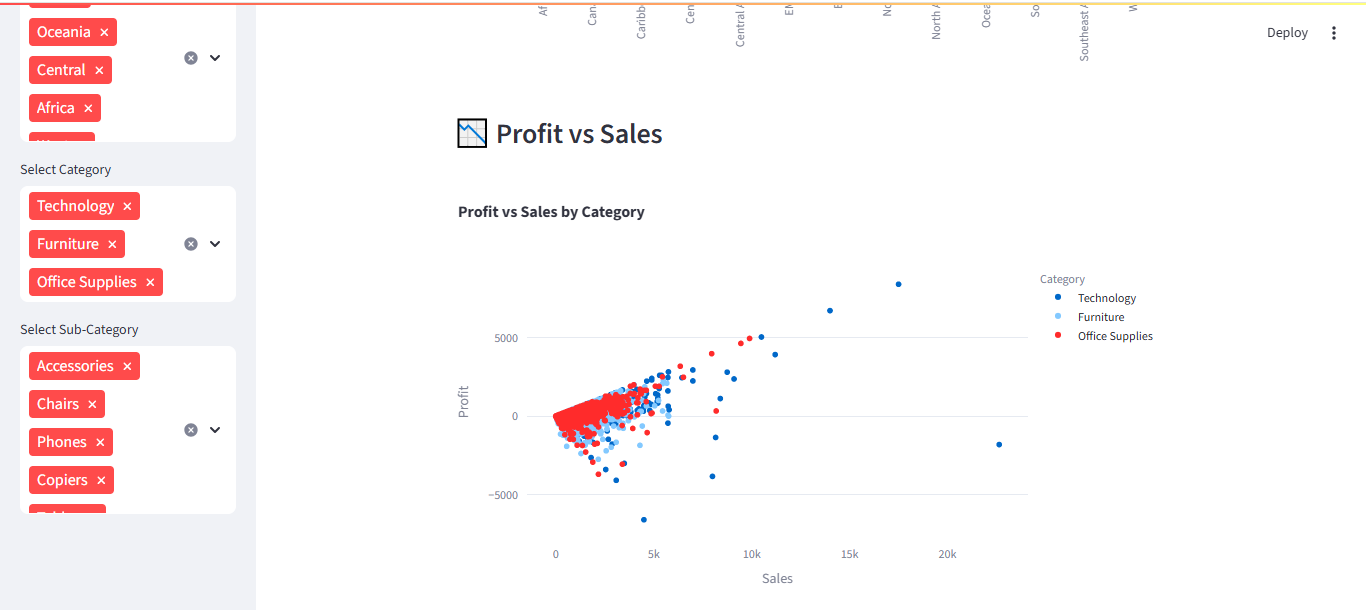